<a href="https://colab.research.google.com/github/golfn123/CE888Project/blob/main/labs/lab5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [13]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
df.columns


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'y'],
      dtype='object')

In [4]:
#How many samples and features are there?
# YOUR CODE HERE
no_sample = 178
no_features=13
print('number of samples:',no_sample, 'number of features:', no_features)

number of samples: 178 number of features: 13


In [5]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE
df.count()

alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
y                               178
dtype: int64

In [6]:
feature_values= np.array(df.iloc[:,:13])
feature_values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
mean=[]
medians=[]
sd=[]
for i in range(13):
  feature_values= np.array(df.iloc[:,i])
  mean.append(np.average(feature_values))
  medians.append(np.median(feature_values))
  sd.append(np.std((feature_values)))

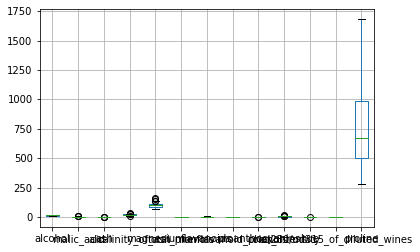

In [8]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE

boxplot= df.boxplot(column=['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline'])

In [9]:
df.columns


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'y'],
      dtype='object')

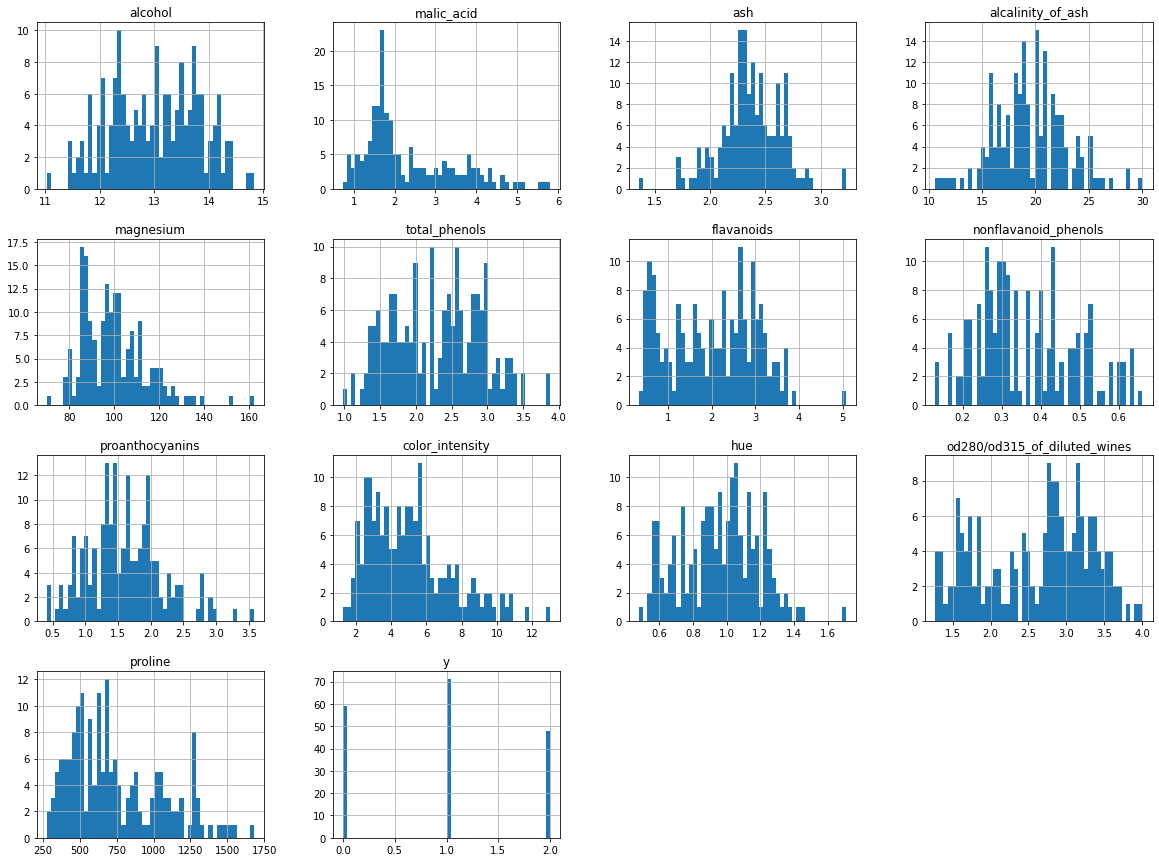

In [10]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
_ = df.hist(bins=50, figsize=(20,15))

In [11]:
label=df['y']
label.value_counts()

1    71
0    59
2    48
Name: y, dtype: int64

Let's do some multivariate analysis

In [22]:
# Calculate the correlations between each pair of variables
# YOUR CODE HERE
df_feats= df.drop(['y'],axis=1)
df_feats.corr()
# YOUR CODE HERE

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


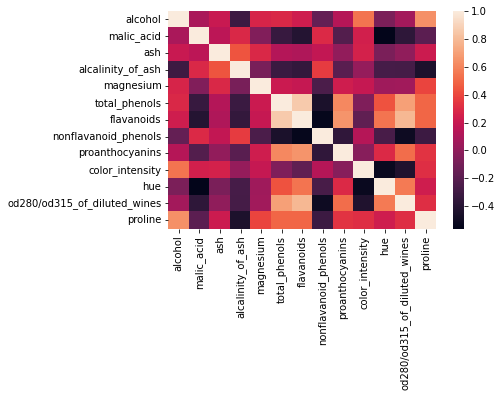

In [23]:
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_feats.corr())

In [24]:
# What is the highest correlation between features?

#flavanoids and total_phenols

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [52]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE
scaled_df = StandardScaler().fit_transform(df.iloc[:,:-1])
scaled_df  = pd.DataFrame(scaled_df, columns = df.columns[:-1])
scaled_df['y'] = df['y'].copy()
scaled_df.head()

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?
pca = PCA(n_components=13)
pca_df = pca.fit_transform(scaled_df.iloc[:,:-1])
np.cumsum(pca.explained_variance_ratio_) 
# YOUR CODE HERE


array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [42]:
def std_pca(df, var): # define inputs: dataframe and variance
    # Your code here
    
    if 'y' in df:
        data = df.drop(['y'], axis = 1)
        
    else:
        data = df
        
        
    #scaler = StandardScaler()
    scaled_df = StandardScaler().fit_transform(data)


    pca = PCA(n_components=var, random_state=100)
    pca_df = pca.fit_transform(scaled_df)
    
    if 'y' in df:
        y = np.array(df['y'])
        df_return = np.concatenate((pca_df,y.reshape(-1, 1)), axis = 1)
    else:
        df_return = pca_df
        
    #ans= pcadf.explained_variance_ratio_
    return  df_return

In [43]:
std_pca(df, 0.85)

array([[ 3.31675081, -1.44346263, -0.16573904, ...,  0.69304284,
        -0.22388013,  0.        ],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.25765463,
        -0.92712024,  0.        ],
       [ 2.51674015, -1.0311513 ,  0.98281867, ..., -0.25103312,
         0.54927605,  0.        ],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  1.271355  ,
         0.27306792,  2.        ],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  0.81395522,
         1.17878298,  2.        ],
       [-3.20875816, -2.76891957,  1.01391366, ..., -0.89519259,
         0.29609218,  2.        ]])

In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE


In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE


In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE


## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!